In [418]:
using LinearAlgebra
using Distributions
using FileIO
import JLD2
using DataFrames

In [419]:
using Revise
using Newtrinos
using Newtrinos.osc

In [420]:
osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.NNM(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg)

physics = (; osc);

In [421]:
experiments = (

   katrin= Newtrinos.katrin.configure(physics),
);

Observed counts length: 50


[ Info: Loading Katrin data
┌ Warning: thread = 1 warning: parsed expected 1 columns, but didn't reach end of line around data row: 1. Parsing extra columns and widening final columnset
└ @ CSV ~/.julia/packages/CSV/XLcqT/src/file.jl:593


In [422]:
mass_nu=Newtrinos.osc.get_neutrinomass(osc_cfg.flavour)

(::Newtrinos.osc.var"#NeutrinoMassNND#50"{NNM}) (generic function with 1 method)

In [423]:
par= Newtrinos.get_params(experiments)

(N = 20.0, m₀ = 0.1, r = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [424]:
mass_nu_value= mass_nu(par)

0.04099460948787201

In [425]:
osc_cfg_SM = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.ThreeFlavour(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg_SM)

physics_SM = (; osc);

In [426]:
experiments_SM = (

   katrin= Newtrinos.katrin.configure(physics_SM),
);

Observed counts length: 50


[ Info: Loading Katrin data
┌ Warning: thread = 1 warning: parsed expected 1 columns, but didn't reach end of line around data row: 1. Parsing extra columns and widening final columnset
└ @ CSV ~/.julia/packages/CSV/XLcqT/src/file.jl:593


In [427]:
NeutrinoMass_SM=Newtrinos.osc.get_neutrinomass_SM(osc_cfg_SM.flavour)

(::Newtrinos.osc.var"#NeutrinoMass_SM#51") (generic function with 1 method)

In [428]:
p = Newtrinos.get_params(experiments_SM)

(Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [429]:
mass_nu_value_SM= NeutrinoMass_SM(p)

0.010074612940900002

Calculation of m0 from m_nu measeurement in SM 

In [430]:
m_nu_squared=0.6 # eV^2, from KATRIN measurement

p= Newtrinos.get_params(experiments_SM)
U= Newtrinos.osc.get_PMNS(p)

sumU = 0.0

for i in 1:3
    sumU += abs(U[1,i])^2
end

term1= abs(U[1,2])^2*(p[:Δm²₂₁])
term2= abs(U[1,2])^2*(p[:Δm²₃₁])

m0_squared= (m_nu_squared-term1-term2) / sumU

m0=sqrt(m0_squared)

0.7741016790565695

POSTERIOR STUDY

In [431]:
posterior_sm=Newtrinos.katrin.get_posterior_SM(p)

┌ Warning: thread = 1 warning: parsed expected 1 columns, but didn't reach end of line around data row: 1. Parsing extra columns and widening final columnset
└ @ CSV ~/.julia/packages/CSV/XLcqT/src/file.jl:593


50×2 Matrix{Float64}:
 2.53871e-5   0.00503856
 0.0140988    0.0109211
 0.0315684    0.0113866
 0.0499254    0.0118808
 0.0709447    0.0125434
 0.0999254    0.0131359
 0.123252     0.0136959
 0.149925     0.0142474
 0.199925     0.0149883
 0.249925     0.0153765
 0.299925     0.0153416
 0.349925     0.0150424
 0.399925     0.0143377
 ⋮           
 1.34909      4.99986e-5
 1.40941      0.0
 1.44389      0.0
 1.48699      0.0
 1.52148      0.0
 1.55596      0.0
 1.61199      0.0
 1.66803      0.0
 1.73697     -4.99989e-5
 1.7801       0.0
 1.84475      0.0
 1.93099      4.9999e-5

In [432]:
using CairoMakie
using CSV

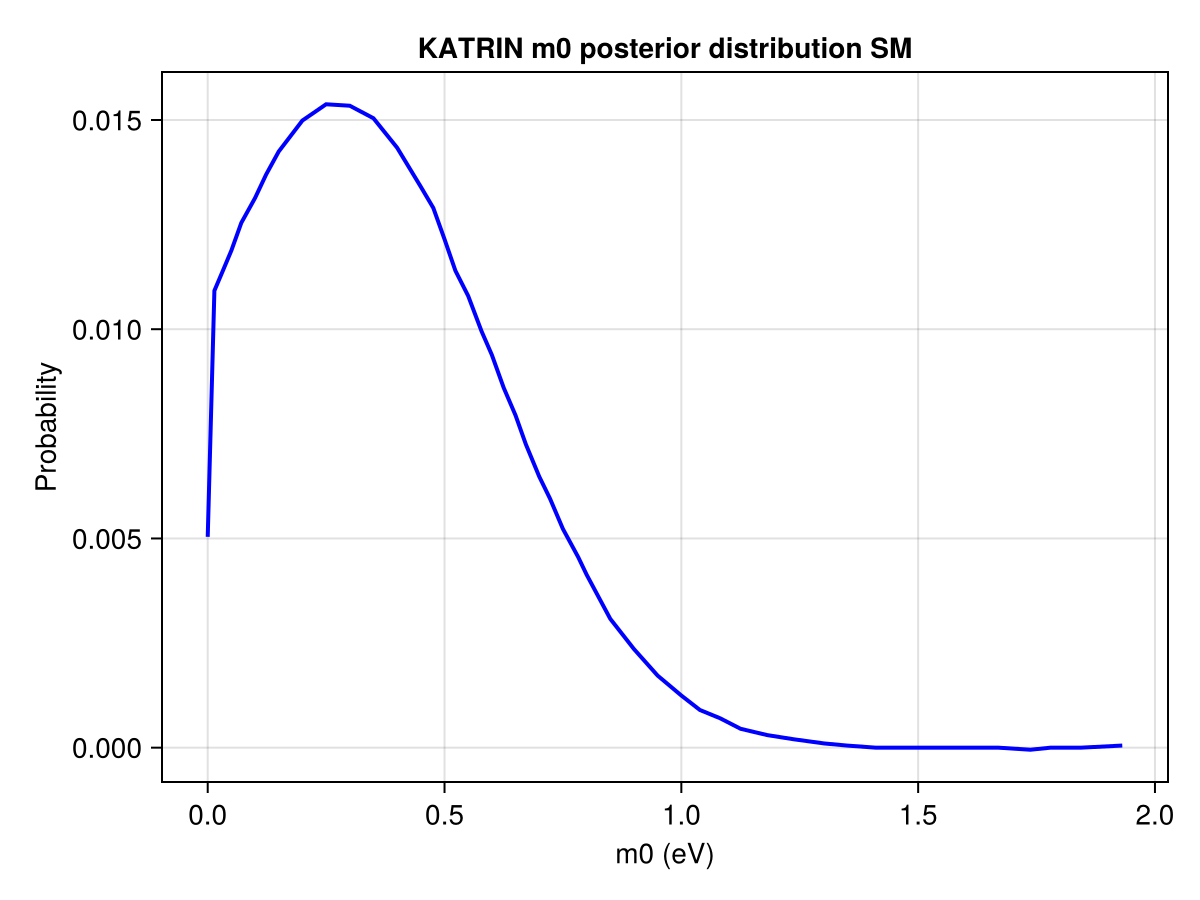

In [433]:
lines(posterior_sm[:, 1], posterior_sm[:, 2],
      axis=(xlabel="m0 (eV)", ylabel="Probability", title="KATRIN m0 posterior distribution SM"),
      color=:blue,
      linewidth=2)

In [434]:
posterior_data_m_nu=CSV.read("/home/sofialon/Newtrinos.jl/src/experiments/katrin/posterior_m_nu.csv", DataFrame)

┌ Warning: thread = 1 warning: parsed expected 1 columns, but didn't reach end of line around data row: 1. Parsing extra columns and widening final columnset
└ @ CSV ~/.julia/packages/CSV/XLcqT/src/file.jl:593


Row,mass probability,Column2
,Float64,Float64
1,0.0001,0.01
2,0.0141734,0.01095
3,0.031643,0.0114
4,0.05,0.0118896
5,0.0710193,0.01255
6,0.1,0.0131408
7,0.123327,0.0137
8,0.15,0.014251
9,0.2,0.0149911


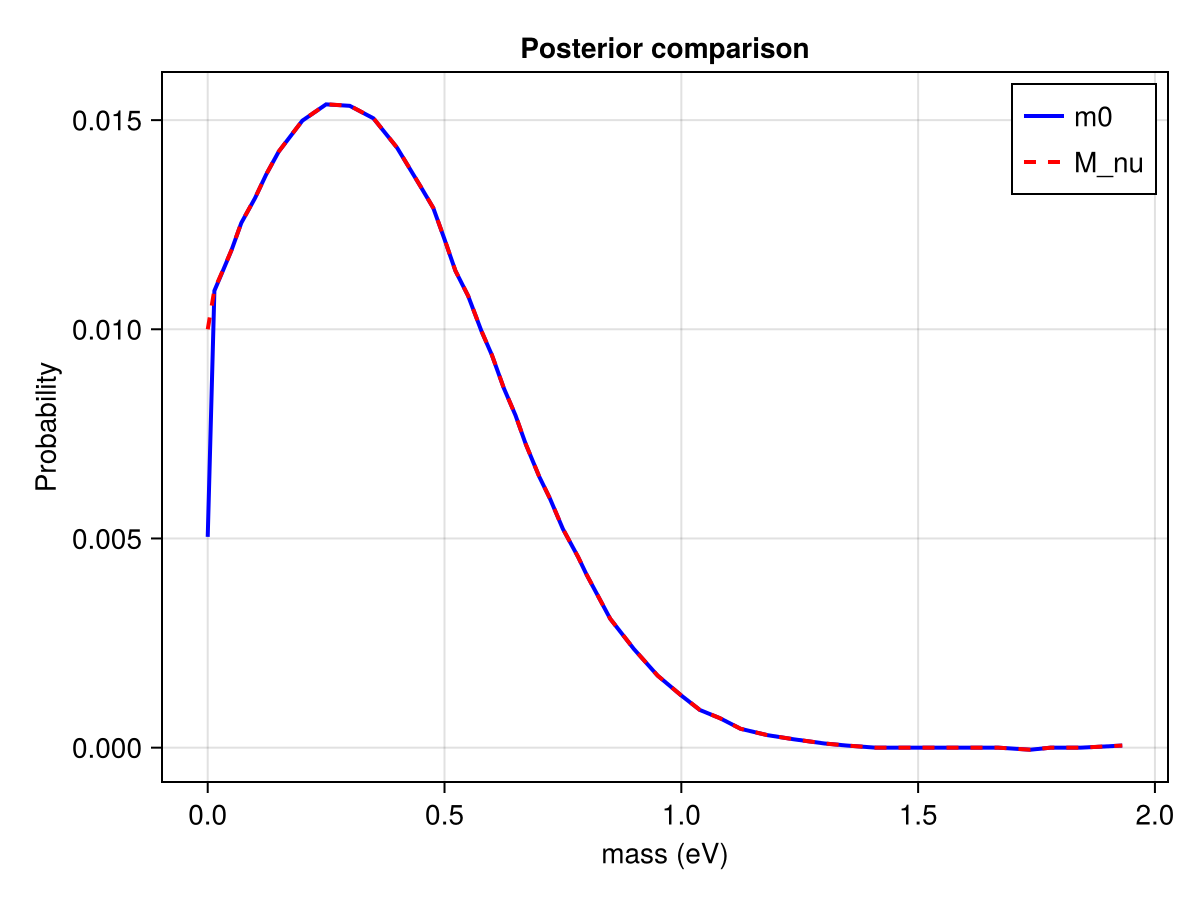

In [435]:

fig = Figure()
ax = Axis(fig[1, 1], xlabel="mass (eV)", ylabel="Probability", title="Posterior comparison")

lines!(ax, posterior_sm[:, 1], posterior_sm[:, 2], 
       color=:blue, linewidth=2, label="m0")
lines!(ax, posterior_data_m_nu[:, 1], posterior_data_m_nu[:, 2], 
       color=:red, linewidth=2, linestyle=:dash, label="M_nu")

axislegend(ax)
fig

In [436]:
posterior_NN=Newtrinos.katrin.get_posterior_NN(par, osc_cfg.flavour)

┌ Warning: thread = 1 warning: parsed expected 1 columns, but didn't reach end of line around data row: 1. Parsing extra columns and widening final columnset
└ @ CSV ~/.julia/packages/CSV/XLcqT/src/file.jl:593


50×2 Matrix{Float64}:
 0.0         0.18469
 0.0         0.0130194
 0.0         0.00324722
 0.0157896   0.00668143
 0.0368089   0.00903508
 0.0657896   0.0106586
 0.0891162   0.0116458
 0.11579     0.0125208
 0.16579     0.0136489
 0.21579     0.0142879
 0.26579     0.0144422
 0.31579     0.0142898
 0.36579     0.0137122
 ⋮          
 1.31495     4.9362e-5
 1.37527     0.0
 1.40976     0.0
 1.45286     0.0
 1.48734     0.0
 1.52182     0.0
 1.57786     0.0
 1.63389     0.0
 1.70283    -4.95052e-5
 1.74596     0.0
 1.81062     0.0
 1.89685     4.95551e-5

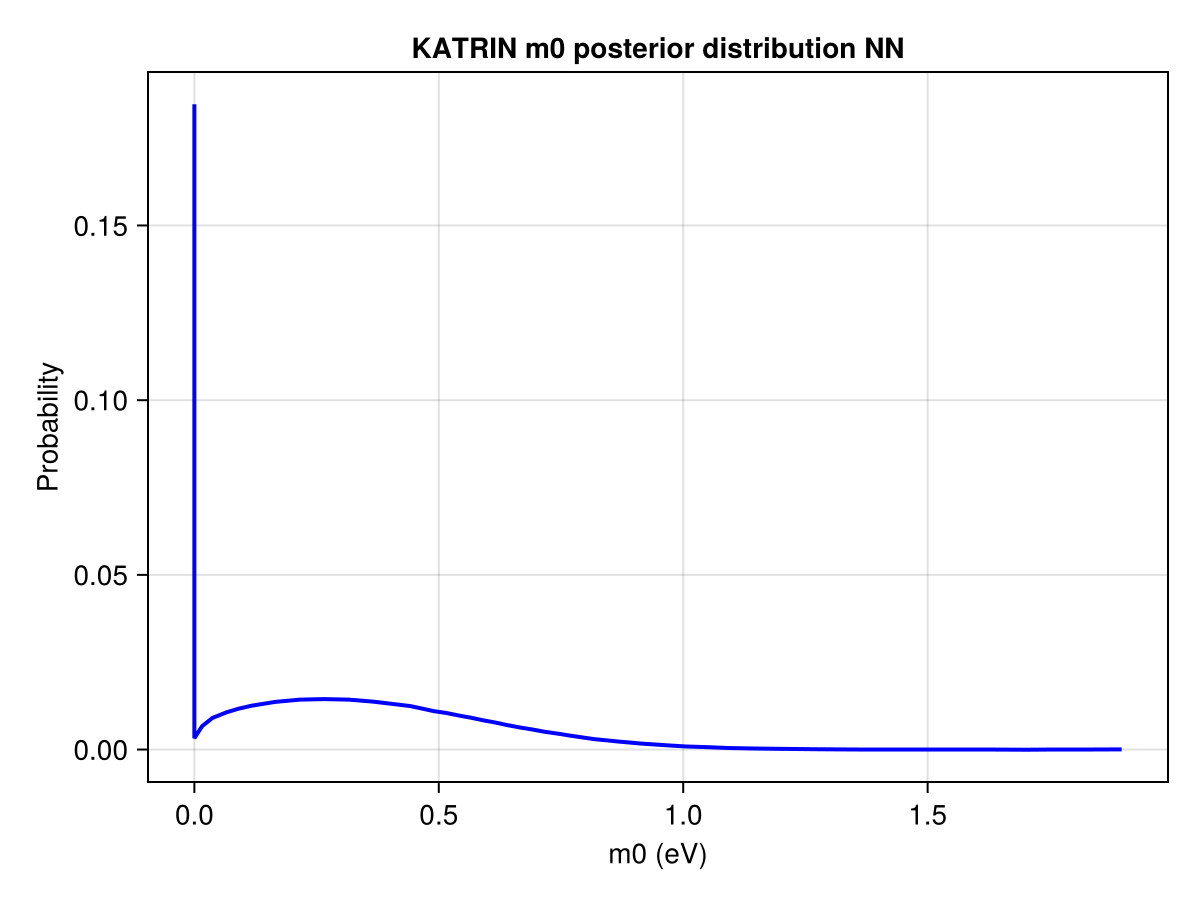

In [437]:
lines(posterior_NN[:, 1], posterior_NN[:, 2],
      axis=(xlabel="m0 (eV)", ylabel="Probability", title="KATRIN m0 posterior distribution NN"),
      color=:blue,
      linewidth=2)

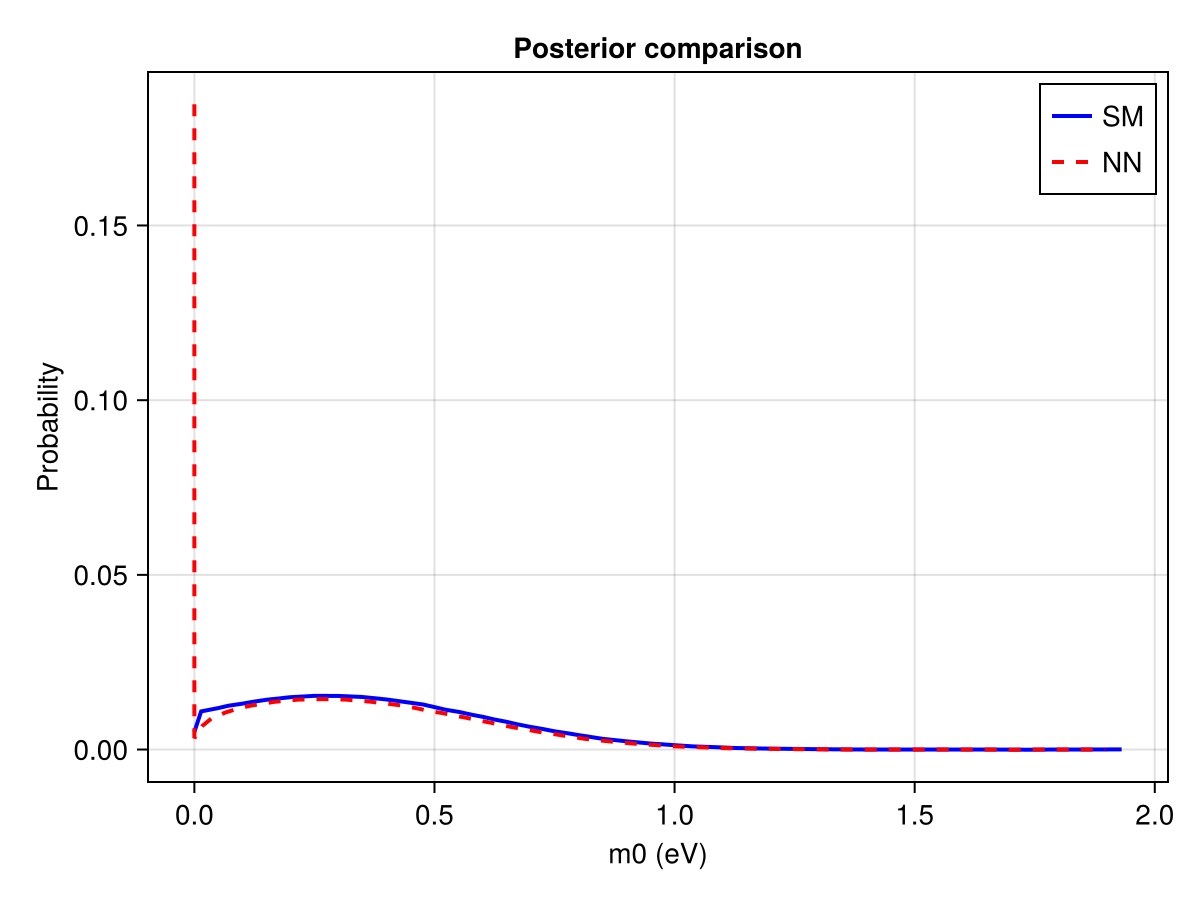

In [438]:

fig = Figure()
ax = Axis(fig[1, 1], xlabel="m0 (eV)", ylabel="Probability", title="Posterior comparison")

lines!(ax, posterior_sm[:, 1], posterior_sm[:, 2], 
       color=:blue, linewidth=2, label="SM")
lines!(ax, posterior_NN[:, 1], posterior_NN[:, 2], 
       color=:red, linewidth=2, linestyle=:dash, label="NN")

axislegend(ax)
fig

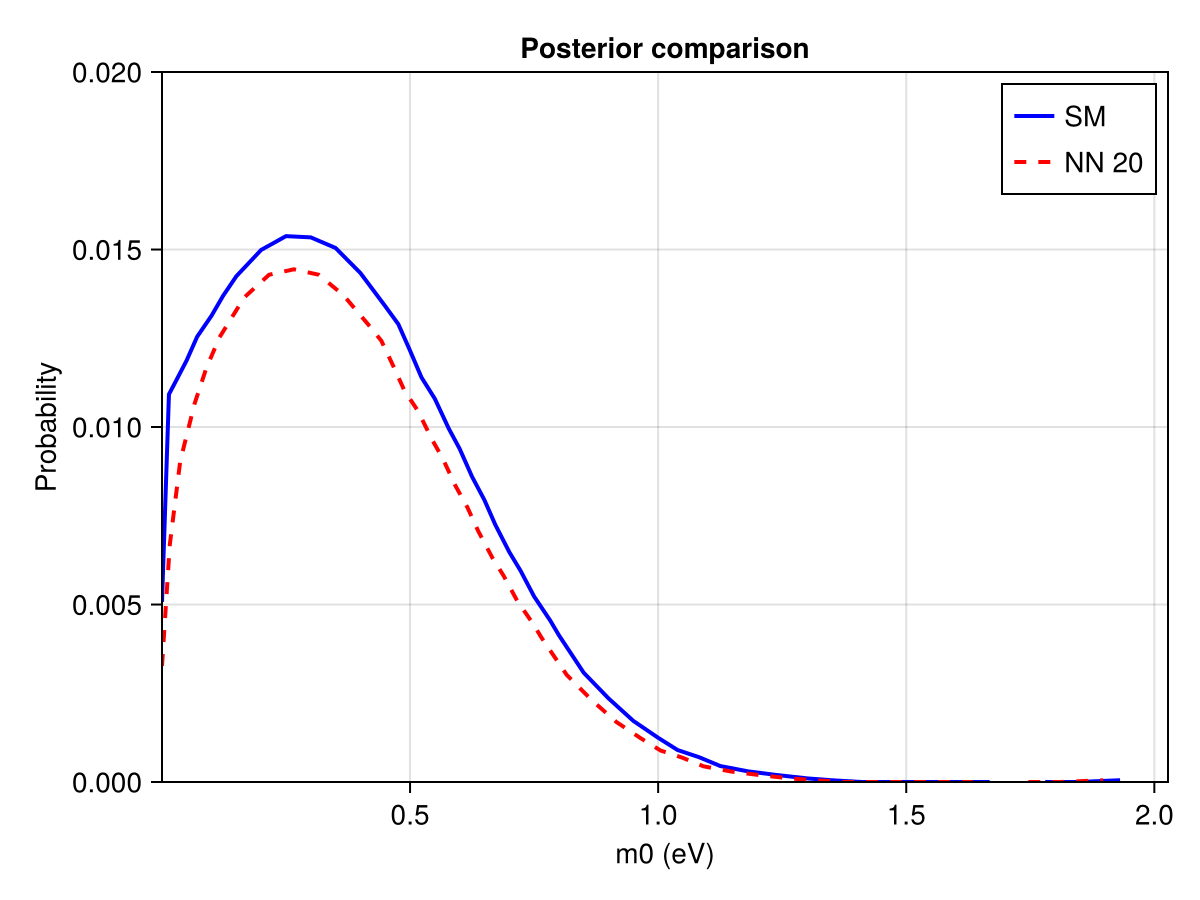

In [439]:
N=round(Int,par[:N])
fig = Figure()
ax = Axis(fig[1, 1], xlabel="m0 (eV)", ylabel="Probability", title="Posterior comparison")

lines!(ax, posterior_sm[:, 1], posterior_sm[:, 2], 
       color=:blue, linewidth=2, label="SM")
lines!(ax, posterior_NN[:, 1], posterior_NN[:, 2], 
       color=:red, linewidth=2, linestyle=:dash, label="NN $N")

xlims!(ax, 0.0001, nothing)
ylims!(ax, 0,0.02)  
axislegend(ax)
fig

Likelihood ratio and r-m0 estimation

In [440]:

all_priors = Newtrinos.get_priors(experiments)


vars_to_scan = (r=31, m₀=31)  

modified_priors = (
    N = par.N,
    m₀ =all_priors.m₀,
    r = all_priors.r,
    
   
  

    Δm²₂₁ = par.Δm²₂₁,
    Δm²₃₁ = all_priors.Δm²₃₁,
    δCP = par.δCP,
    θ₁₂ = par.θ₁₂,
    θ₁₃ = all_priors.θ₁₃,
    θ₂₃ = par.θ₂₃
    

)


(N = 20.0, m₀ = Uniform{Float64}(a=0.001, b=2.0), r = Uniform{Float64}(a=1.0e-8, b=1.0), Δm²₂₁ = 7.53e-5, Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = 0.8556288707523761)

In [441]:
likelihood = Newtrinos.generate_likelihood(experiments);

In [442]:

result = Newtrinos.scan(likelihood, modified_priors, vars_to_scan, par)

┌ Warning: thread = 1 warning: parsed expected 1 columns, but didn't reach end of line around data row: 1. Parsing extra columns and widening final columnset
└ @ CSV ~/.julia/packages/CSV/XLcqT/src/file.jl:593
┌ Warning: thread = 3 warning: parsed expected 1 columns, but didn't reach end of line around data row: 1. Parsing extra columns and widening final columnset
└ @ CSV ~/.julia/packages/CSV/XLcqT/src/file.jl:593
┌ Warning: thread = 4 warning: parsed expected 1 columns, but didn't reach end of line around data row: 1. Parsing extra columns and widening final columnset
└ @ CSV ~/.julia/packages/CSV/XLcqT/src/file.jl:593
┌ Warning: thread = 2 warning: parsed expected 1 columns, but didn't reach end of line around data row: 1. Parsing extra columns and widening final columnset
└ @ CSV ~/.julia/packages/CSV/XLcqT/src/file.jl:593


LoadError: TaskFailedException

[91m    nested task error: [39mMethodError: no method matching get_matrices(::Type{NNM})
    The function `get_matrices` exists, but no method is defined for this combination of argument types.
    
    [0mClosest candidates are:
    [0m  get_matrices([91m::NNM[39m)
    [0m[90m   @[39m [35mNewtrinos[39m [90m~/Newtrinos.jl/src/physics/[39m[90m[4mosc.jl:670[24m[39m
    [0m  get_matrices([91m::NND[39m)
    [0m[90m   @[39m [35mNewtrinos[39m [90m~/Newtrinos.jl/src/physics/[39m[90m[4mosc.jl:571[24m[39m
    [0m  get_matrices([91m::ADD[39m)
    [0m[90m   @[39m [35mNewtrinos[39m [90m~/Newtrinos.jl/src/physics/[39m[90m[4mosc.jl:518[24m[39m
    [0m  ...
    
    Stacktrace:
      [1] [0m[1mget_posterior_NN[22m[0m[1m([22m[90mparams[39m::[0m@NamedTuple[90m{N::Float64, m₀::Float64, r::Float64, Δm²₂₁::Float64, Δm²₃₁::Float64, δCP::Float64, θ₁₂::Float64, θ₁₃::Float64, θ₂₃::Float64}[39m, [90mcfg[39m::[0mType[0m[1m)[22m
    [90m    @[39m [35mNewtrinos.osc[39m [90m~/Newtrinos.jl/src/physics/[39m[90m[4mosc.jl:851[24m[39m
      [2] [0m[1mget_posterior_NN[22m
    [90m    @[39m [90m~/Newtrinos.jl/src/physics/[39m[90m[4mosc.jl:830[24m[39m[90m [inlined][39m
      [3] [0m[1mforward_model[22m
    [90m    @[39m [90m~/Newtrinos.jl/src/experiments/katrin/[39m[90m[4mkatrin_NN.jl:303[24m[39m[90m [inlined][39m
      [4] [0m[1mapplyf[22m
    [90m    @[39m [90m~/.julia/packages/FunctionChains/iVpMF/src/[39m[90m[4mapplyf.jl:18[24m[39m[90m [inlined][39m
      [5] [0m[1mFix2[22m
    [90m    @[39m [90m./[39m[90m[4moperators.jl:1144[24m[39m[90m [inlined][39m
      [6] [0m[1mmap[22m
    [90m    @[39m [90m./[39m[90m[4mtuple.jl:355[24m[39m[90m [inlined][39m
      [7] [0m[1mFFanout[22m
    [90m    @[39m [90m~/.julia/packages/FunctionChains/iVpMF/src/[39m[90m[4mffanout.jl:63[24m[39m[90m [inlined][39m
      [8] [0m[1mcall_composed[22m
    [90m    @[39m [90m./[39m[90m[4moperators.jl:1054[24m[39m[90m [inlined][39m
      [9] [0m[1mcall_composed[22m
    [90m    @[39m [90m./[39m[90m[4moperators.jl:1053[24m[39m[90m [inlined][39m
     [10] [0m[1m(::ComposedFunction{typeof(BAT.distprod), FunctionChains.FFanout{@NamedTuple{katrin::Newtrinos.katrin.var"#forward_model#28"}}})[22m[0m[1m([22m[90mx[39m::[0m@NamedTuple[90m{N::Float64, m₀::Float64, r::Float64, Δm²₂₁::Float64, Δm²₃₁::Float64, δCP::Float64, θ₁₂::Float64, θ₁₃::Float64, θ₂₃::Float64}[39m; [90mkw[39m::[0m@Kwargs[90m{}[39m[0m[1m)[22m
    [90m    @[39m [90mBase[39m [90m./[39m[90m[4moperators.jl:1050[24m[39m
     [11] [0m[1mlogdensityof[22m
    [90m    @[39m [90m~/.julia/packages/MeasureBase/t8sMc/src/combinators/[39m[90m[4mlikelihood.jl:142[24m[39m[90m [inlined][39m
     [12] [0m[1mmacro expansion[22m
    [90m    @[39m [90m~/Newtrinos.jl/src/analysis/[39m[90m[4manalysis_tools.jl:238[24m[39m[90m [inlined][39m
     [13] [0m[1m(::Newtrinos.var"#162#threadsfor_fun#24"{Newtrinos.var"#162#threadsfor_fun#17#25"{Bool, MeasureBase.Likelihood{ComposedFunction{typeof(BAT.distprod), FunctionChains.FFanout{@NamedTuple{katrin::Newtrinos.katrin.var"#forward_model#28"}}}, @NamedTuple{katrin::Normal{Float64}}}, ProgressMeter.Progress, Matrix{Any}, Matrix{Any}, Base.OneTo{Int64}}})[22m[0m[1m([22m[90mtid[39m::[0mInt64; [90monethread[39m::[0mBool[0m[1m)[22m
    [90m    @[39m [35mNewtrinos[39m [90m./[39m[90m[4mthreadingconstructs.jl:253[24m[39m
     [14] [0m[1m#162#threadsfor_fun[22m
    [90m    @[39m [90m./[39m[90m[4mthreadingconstructs.jl:220[24m[39m[90m [inlined][39m
     [15] [0m[1m(::Base.Threads.var"#1#2"{Newtrinos.var"#162#threadsfor_fun#24"{Newtrinos.var"#162#threadsfor_fun#17#25"{Bool, MeasureBase.Likelihood{ComposedFunction{typeof(BAT.distprod), FunctionChains.FFanout{@NamedTuple{katrin::Newtrinos.katrin.var"#forward_model#28"}}}, @NamedTuple{katrin::Normal{Float64}}}, ProgressMeter.Progress, Matrix{Any}, Matrix{Any}, Base.OneTo{Int64}}}, Int64})[22m[0m[1m([22m[0m[1m)[22m
    [90m    @[39m [90mBase.Threads[39m [90m./[39m[90m[4mthreadingconstructs.jl:154[24m[39m

...and 3 more exceptions.


In [ ]:
println("Scan result: ", result.values.log_posterior)

Scan result: Any[[-2.783545474652522e11, -3.831512516196487e13, -8.783254282146477e13, -1.6471490924441075e14, -3.0637705461796444e14, -4.7007266868429244e14, -6.571715664144638e14, -8.721000224502584e14, -1.2085908491169155e15, -1.4067094925360342e15, -1.388077640187234e15, -1.234722007883596e15, -9.092860212479455e14, -5.5461426869833644e14, -3.991406016864642e14, -2.1618471369103812e14, -8.783254282146477e13, -2.609734759687029e13, -7.764192519652798e11, -2.3618887421965195e13, -1.0872416627346581e14, -2.2733467809835072e14, -3.9892191329496594e14, -6.461724791857868e14, -8.506215956119665e14, -1.174223968044806e15, -1.5260674073379662e15, -1.7633722288554598e15, -2.4471708918262175e15, -2.978729229572044e15, -3.488503294019289e15, -3.897244698814898e15, -4.208676130766469e15, -4.3941683895844675e15, -4.631658713106965e15, -4.777152907220469e15, -4.875399036629465e15, -4.974645166038468e15, -5.024643230742969e15, -5.074891295447468e15, -5.074891295447468e15, -5.074891295447468e15, -

, -2.609734759687029e13, -7.764192519652798e11, -2.3618887421965195e13, -1.0872416627346581e14, -2.2733467809835072e14, -3.9892191329496594e14, -6.461724791857868e14, -8.506215956119665e14, -1.174223968044806e15, -1.5260674073379662e15, -1.7633722288554598e15, -2.4471708918262175e15, -2.978729229572044e15, -3.488503294019289e15, -3.897244698814898e15, -4.208676130766469e15, -4.3941683895844675e15, -4.631658713106965e15, -4.777152907220469e15, -4.875399036629465e15, -4.974645166038468e15, -5.024643230742969e15, -5.074891295447468e15, -5.074891295447468e15, -5.074891295447468e15, -5.074891295447468e15, -5.074891295447468e15, -5.074891295447468e15, -5.074891295447468e15, -5.125389360151969e15, -5.074891295447468e15, -5.074891295447468e15, -5.024643230742969e15] [-2.783545474652522e11, -3.831512516196487e13, -8.783254282146477e13, -1.6471490924441075e14, -3.0637705461796444e14, -4.7007266868429244e14, -6.571715664144638e14, -8.721000224502584e14, -1.2085908491169155e15, -1.4067094925360342

Excessive output truncated after 524291 bytes.

, -1.6471490924441075e14, -3.0637705461796444e14, -4.7007266868429244e14, -6.571715664144638e14, -8.721000224502584e14, -1.2085908491169155e15, -1.4067094925360342e15, -1.388077640187234e15, -1.234722007883596e15, -9.092860212479455e14, -5.5461426869833644e14, -3.991406016864642e14, -2.1618471369103812e14, -8.783254282146477e13, -2.609734759687029e13, -7.764192519652798e11, -2.3618887421965195e13, -1.0872416627346581e14, -2.2733467809835072e14, -3.9892191329496594e14, -6.461724791857868e14, -8.506215956119665e14, -1.174223968044806e15, -1.5260674073379662e15, -1.7633722288554598e15, -2.4471708918262175e15, -2.978729229572044e15,

In [ ]:
using CairoMakie


In [ ]:

katrin_exp = experiments.katrin
posterior_sample = katrin_exp.assets.observed
posterior_mean = mean(posterior_sample)
posterior_std = std(posterior_sample)
katrin_posterior = Normal(posterior_mean, posterior_std)

predicted = Newtrinos.katrin.get_posterior_SM(par)

likelihood = Newtrinos.generate_likelihood(experiments)  
result = Newtrinos.scan(likelihood, modified_priors, vars_to_scan, par)  

┌ Warning: thread = 1 warning: parsed expected 1 columns, but didn't reach end of line around data row: 1. Parsing extra columns and widening final columnset
└ @ CSV ~/.julia/packages/CSV/XLcqT/src/file.jl:593


LoadError: MethodError: no method matching generate_likelihood(::@NamedTuple{katrin::Newtrinos.katrin.Katrin}; observed::Normal{Float64})
This method may not support any kwargs.

[0mClosest candidates are:
[0m  generate_likelihood(::NamedTuple, [91m::Any[39m)[91m got unsupported keyword argument "observed"[39m
[0m[90m   @[39m [35mNewtrinos[39m [90m~/Newtrinos.jl/src/analysis/[39m[90m[4manalysis_tools.jl:325[24m[39m
[0m  generate_likelihood(::NamedTuple)[91m got unsupported keyword argument "observed"[39m
[0m[90m   @[39m [35mNewtrinos[39m [90m~/Newtrinos.jl/src/analysis/[39m[90m[4manalysis_tools.jl:325[24m[39m
